In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Krishna\Downloads\DS-training-main\DS-training-main\fraudDetection\data\insuranceFraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# missing values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [7]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [8]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [9]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

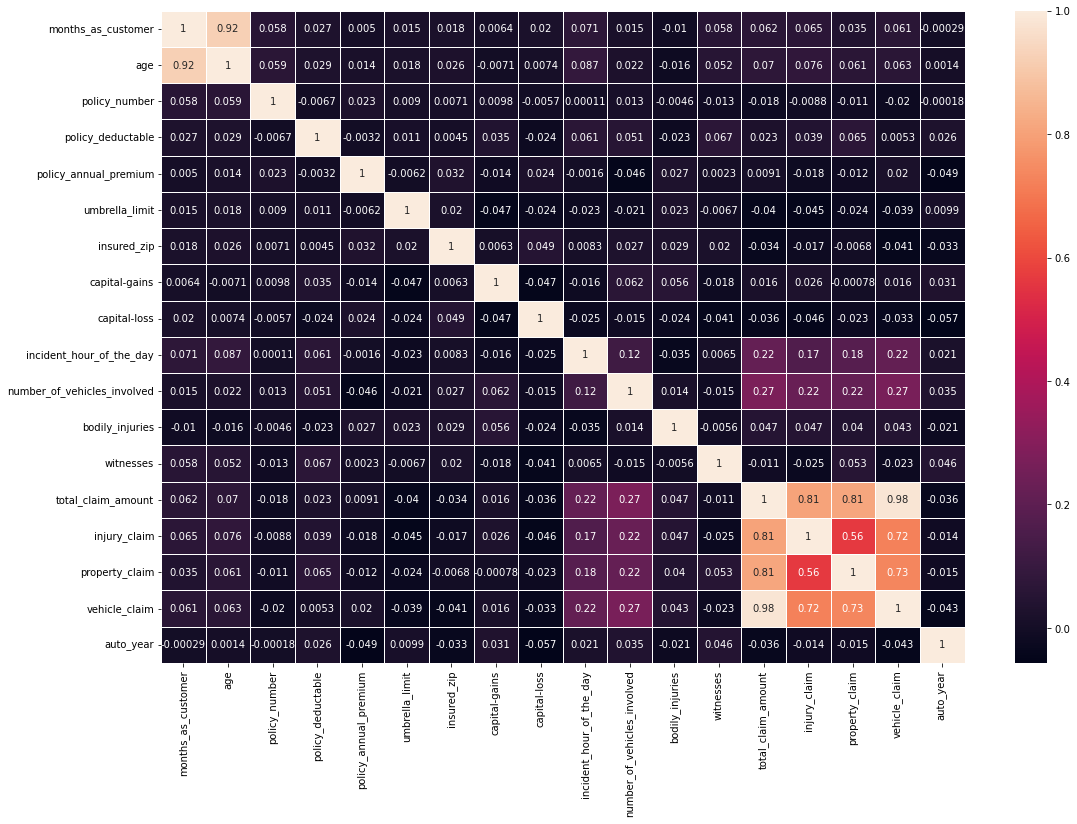

In [11]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()


In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [13]:
to_drop = ['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available']
df.drop(to_drop, inplace = True, axis = 1)

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,1000,1406.91,0,466132,craft-repair,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,2000,1197.22,5000000,468176,machine-op-inspct,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,2000,1413.14,5000000,430632,sales,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,2000,1415.74,6000000,608117,armed-forces,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,1000,1583.91,6000000,610706,sales,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N


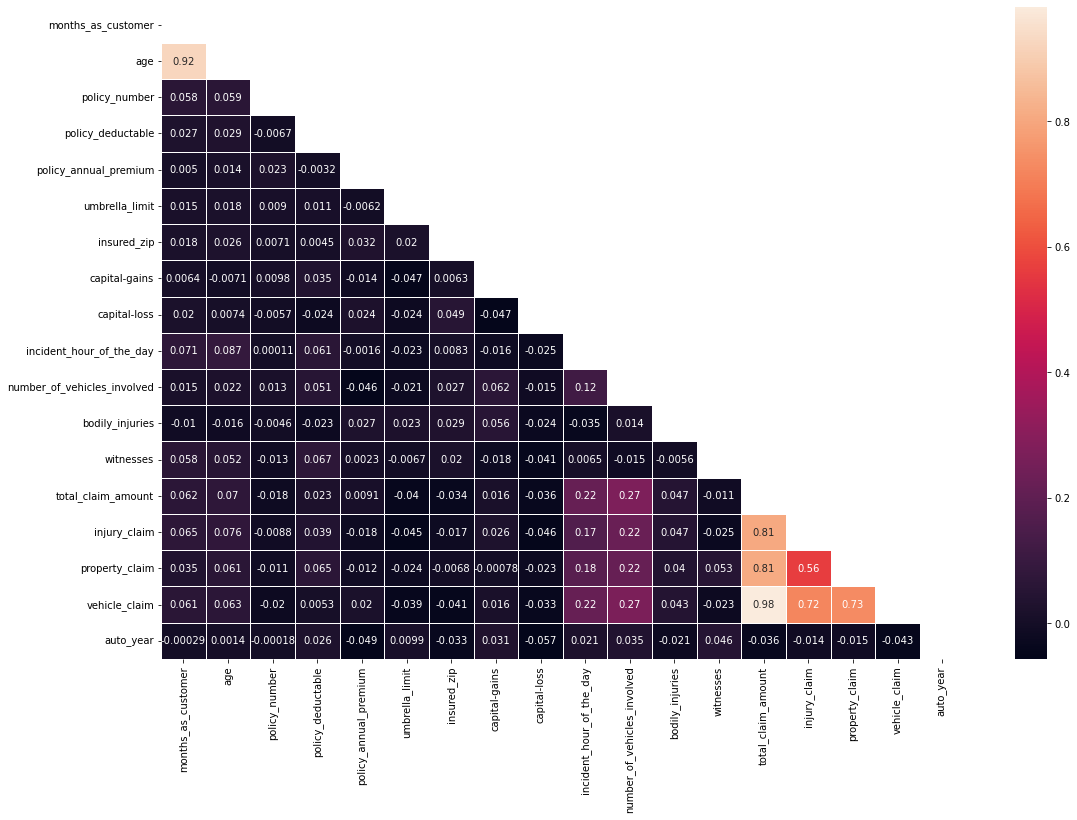

In [15]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [16]:
df.drop(columns = ['age', 'total_claim_amount' ], inplace = True, axis = 1)

In [17]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,insured_hobbies,...,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,10/17/2014,OH,1000,1406.91,0,466132,craft-repair,sleeping,...,1,1,2,6510,13020,52080,Saab,92x,2004,Y
1,228,342868,6/27/2006,IN,2000,1197.22,5000000,468176,machine-op-inspct,reading,...,1,0,0,780,780,3510,Mercedes,E400,2007,Y
2,134,687698,9/6/2000,OH,2000,1413.14,5000000,430632,sales,board-games,...,3,2,3,7700,3850,23100,Dodge,RAM,2007,N
3,256,227811,5/25/1990,IL,2000,1415.74,6000000,608117,armed-forces,board-games,...,1,1,2,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,367455,6/6/2014,IL,1000,1583.91,6000000,610706,sales,board-games,...,1,0,1,1300,650,4550,Accura,RSX,2009,N


In [18]:
df.info

<bound method DataFrame.info of      months_as_customer  policy_number policy_bind_date policy_state  \
0                   328         521585       10/17/2014           OH   
1                   228         342868        6/27/2006           IN   
2                   134         687698         9/6/2000           OH   
3                   256         227811        5/25/1990           IL   
4                   228         367455         6/6/2014           IL   
..                  ...            ...              ...          ...   
995                   3         941851        7/16/1991           OH   
996                 285         186934         1/5/2014           IL   
997                 130         918516        2/17/2003           OH   
998                 458         533940       11/18/2011           IL   
999                 456         556080       11/11/1996           OH   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000   

In [19]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [20]:
# extracting categorical columns
categorical_df = X.select_dtypes(include = ['object'])

In [21]:
categorical_df.head()

,policy_bind_date,policy_state,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model
0,10/17/2014,OH,craft-repair,sleeping,husband,1/25/2015,Single Vehicle Collision,Side Collision,Police,SC,Columbus,9935 4th Drive,Saab,92x
1,6/27/2006,IN,machine-op-inspct,reading,other-relative,1/21/2015,Vehicle Theft,Rear Collision,Police,VA,Riverwood,6608 MLK Hwy,Mercedes,E400
2,9/6/2000,OH,sales,board-games,own-child,2/22/2015,Multi-vehicle Collision,Rear Collision,Police,NY,Columbus,7121 Francis Lane,Dodge,RAM
3,5/25/1990,IL,armed-forces,board-games,unmarried,1/10/2015,Single Vehicle Collision,Front Collision,Police,OH,Arlington,6956 Maple Drive,Chevrolet,Tahoe
4,6/6/2014,IL,sales,board-games,unmarried,2/17/2015,Vehicle Theft,Rear Collision,None,NY,Arlington,3041 3rd Ave,Accura,RSX


In [22]:
# printing unique values of each column
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

policy_bind_date: 
['10/17/2014' '6/27/2006' '9/6/2000' '5/25/1990' '6/6/2014' '10/12/2006'
 '6/4/2000' '2/3/1990' '2/5/1997' '7/25/2011' '5/26/2002' '5/29/1999'
 '11/20/1997' '10/26/2012' '12/28/1998' '10/19/1992' '6/8/2005'
 '11/15/2004' '12/28/2014' '8/2/1992' '6/25/2002' '11/27/2005' '5/27/1994'
 '2/8/1991' '2/2/1996' '12/5/2013' '9/20/1990' '7/18/2002' '2/8/1990'
 '3/4/2014' '2/18/2000' '6/19/2008' '8/1/2003' '4/4/1992' '1/13/1991'
 '8/8/2010' '3/9/2003' '2/3/1993' '11/25/2002' '7/27/1997' '5/8/1995'
 '8/30/2012' '4/30/2006' '4/13/2003' '12/5/2007' '8/21/2006' '1/8/1990'
 '3/18/1990' '1/7/2008' '3/10/1997' '1/10/2004' '8/20/1994' '6/2/2002'
 '4/28/1994' '8/17/2014' '8/11/2007' '11/20/2008' '10/18/1995' '5/19/1993'
 '2/26/2005' '2/14/1990' '9/30/1993' '6/10/2014' '10/28/2008' '4/24/2007'
 '12/13/1993' '8/17/2011' '8/20/1990' '2/11/1994' '2/22/1994' '8/15/2011'
 '11/11/1998' '12/4/1995' '12/28/2002' '4/15/2004' '2/2/2001' '1/12/2010'
 '4/14/1992' '5/21/2010' '10/27/2013' '10/12/1994

In [23]:
categorical_df = pd.get_dummies(categorical_df, drop_first = True)

In [24]:
categorical_df.head()

,policy_bind_date_1/1/2008,policy_bind_date_1/10/2004,policy_bind_date_1/10/2012,policy_bind_date_1/11/2009,policy_bind_date_1/11/2010,policy_bind_date_1/12/2010,policy_bind_date_1/12/2012,policy_bind_date_1/13/1991,policy_bind_date_1/14/1998,policy_bind_date_1/14/1999,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [26]:
num_df.head()

,months_as_customer,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
0,328,521585,1000,0,466132,53300,0,5,1,1,2,6510,13020,52080,2004
1,228,342868,2000,5000000,468176,0,0,8,1,0,0,780,780,3510,2007
2,134,687698,2000,5000000,430632,35100,0,7,3,2,3,7700,3850,23100,2007
3,256,227811,2000,6000000,608117,48900,-62400,5,1,1,2,6340,6340,50720,2014
4,228,367455,1000,6000000,610706,66000,-46000,20,1,0,1,1300,650,4550,2009


In [27]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, categorical_df], axis = 1)

In [28]:
X.head()

,months_as_customer,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,521585,1000,0,466132,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,342868,2000,5000000,468176,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,687698,2000,5000000,430632,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,227811,2000,6000000,608117,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,367455,1000,6000000,610706,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

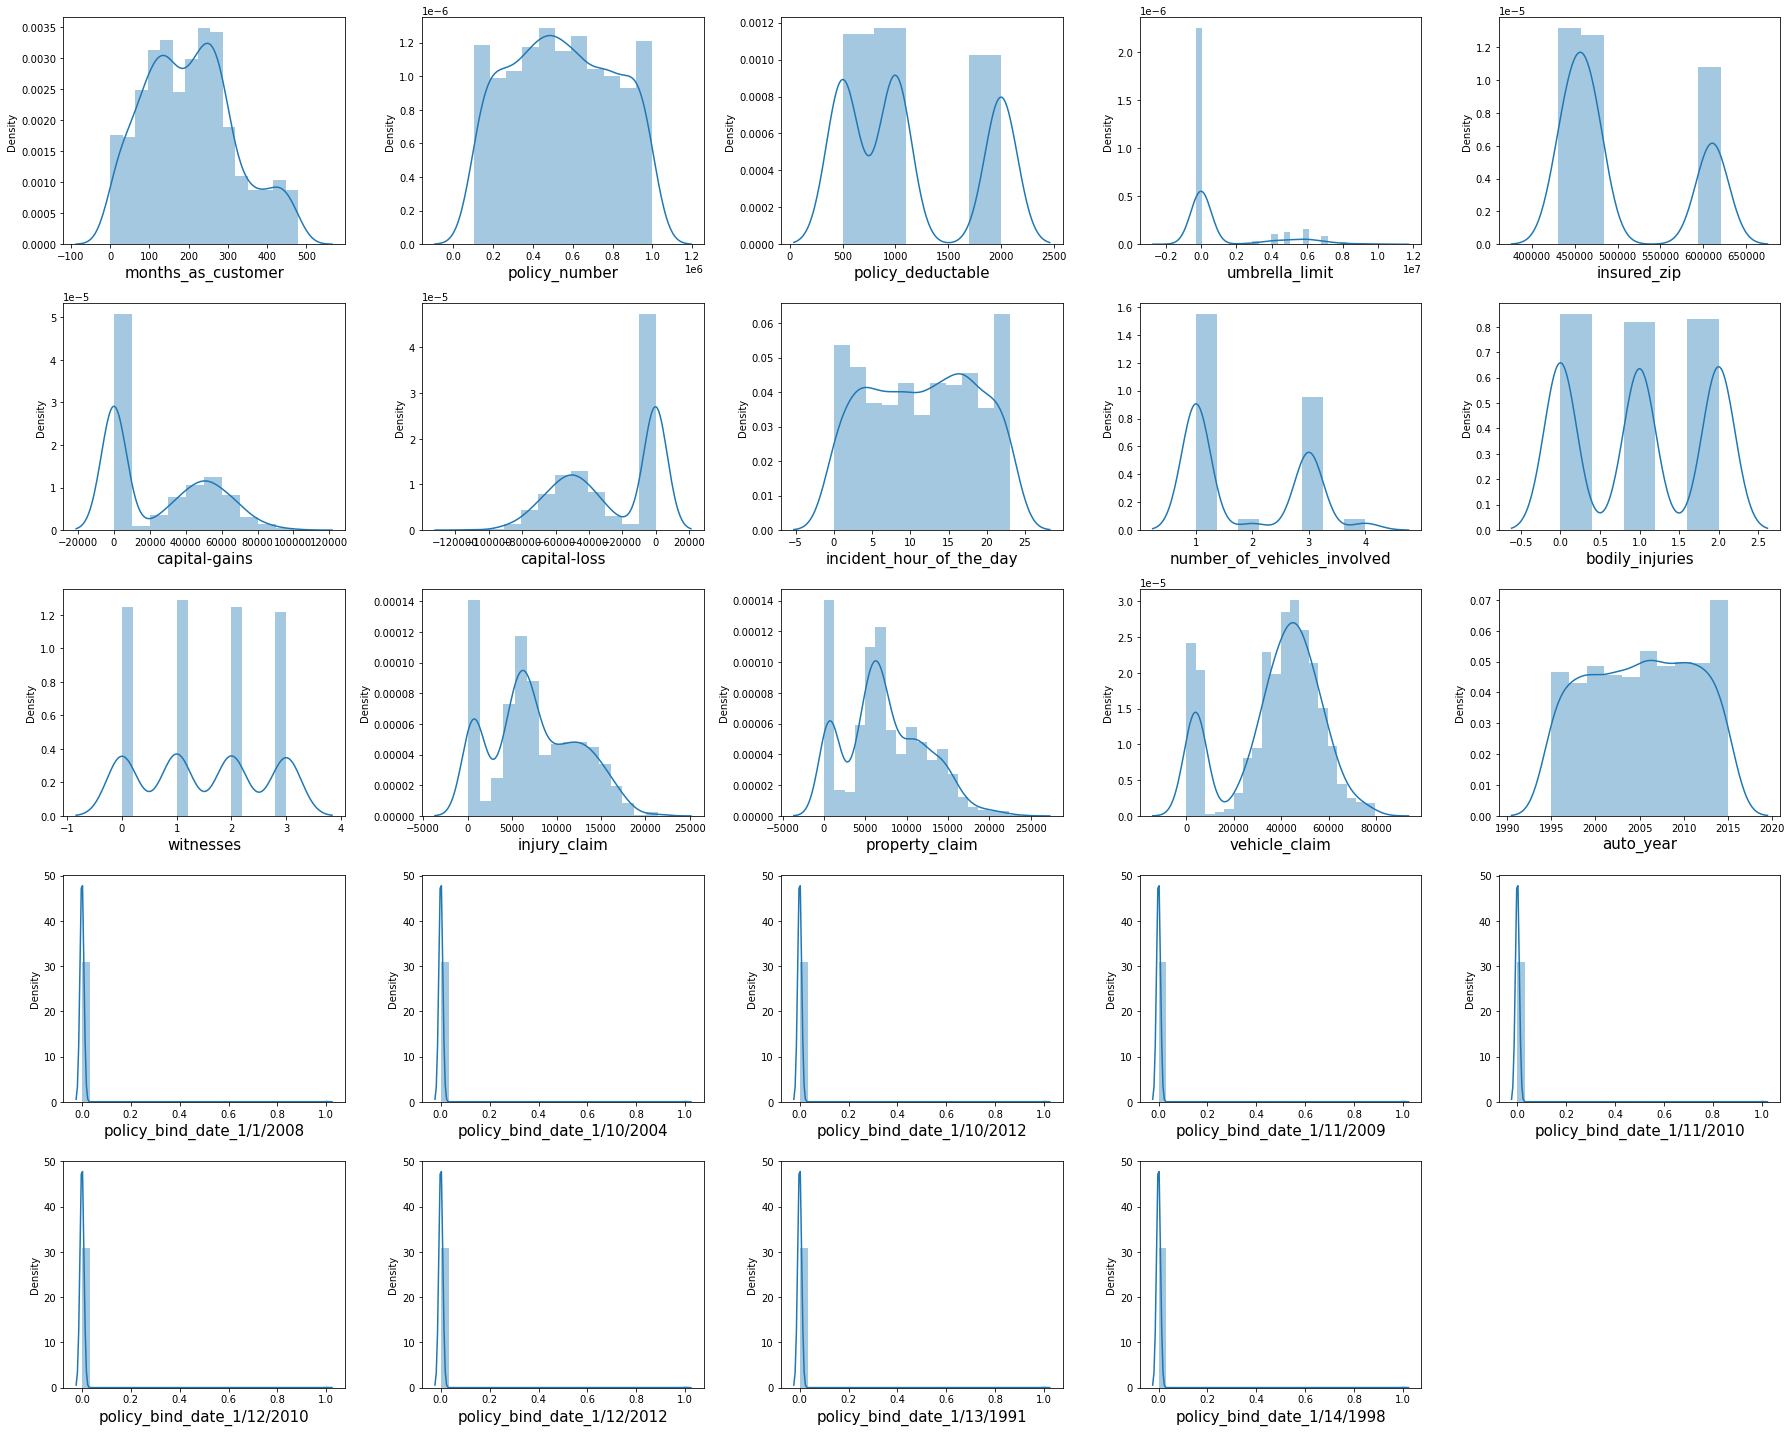

In [29]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

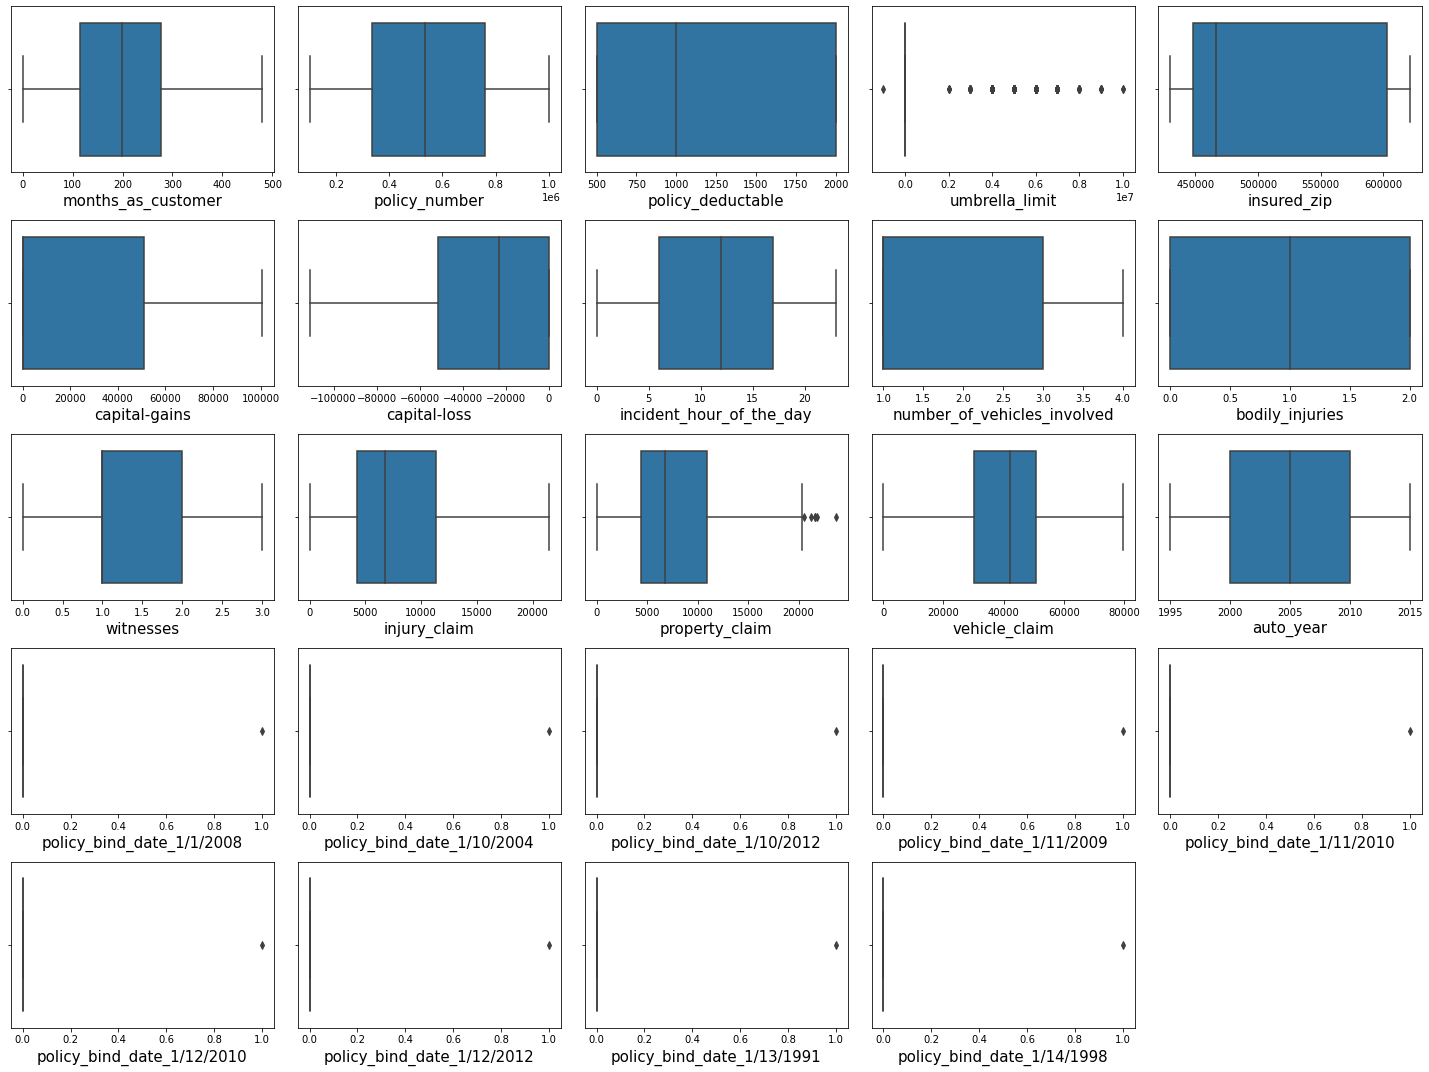

In [30]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

In [31]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
X_train.head()

,months_as_customer,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
187,238,134430,2000,0,600275,0,-39200,9,1,1,...,0,0,0,0,0,1,0,0,0,0
128,274,517240,2000,0,465263,40700,-47300,22,1,0,...,0,0,0,0,0,0,0,0,1,0
180,53,125324,2000,0,614233,72200,0,17,3,2,...,0,0,0,0,0,0,0,0,0,0
456,78,910622,500,0,474792,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,0
259,134,843227,2000,0,613287,0,0,19,3,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [34]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [35]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
187,0.272289,1.389072,-0.459208,-0.891731,-0.481928,-0.363918,-0.814800,0.006493,1.355914,-1.272966,-1.392534,-1.754840
128,0.586468,1.389072,-0.459208,0.566970,-0.772719,1.523421,-0.814800,-1.210994,1.355914,0.627832,0.677780,0.255315
180,-1.342244,1.389072,-0.459208,1.695941,0.925357,0.797522,1.146997,1.223981,-1.353506,0.544149,-0.456892,-0.097280
456,-1.124064,-1.060310,-0.459208,-0.891731,0.925357,1.233061,-0.814800,-1.210994,-0.450366,-1.356648,-1.365860,-1.636963
259,-0.635340,1.389072,-0.459208,-0.891731,0.925357,1.087881,1.146997,-1.210994,0.452774,-0.434144,-0.415855,-0.024580


In [36]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [37]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [38]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
187,0.272289,1.389072,-0.459208,-0.891731,-0.481928,-0.363918,-0.814800,0.006493,1.355914,-1.272966,...,0,0,0,0,0,1,0,0,0,0
128,0.586468,1.389072,-0.459208,0.566970,-0.772719,1.523421,-0.814800,-1.210994,1.355914,0.627832,...,0,0,0,0,0,0,0,0,1,0
180,-1.342244,1.389072,-0.459208,1.695941,0.925357,0.797522,1.146997,1.223981,-1.353506,0.544149,...,0,0,0,0,0,0,0,0,0,0
456,-1.124064,-1.060310,-0.459208,-0.891731,0.925357,1.233061,-0.814800,-1.210994,-0.450366,-1.356648,...,0,0,0,0,0,0,0,0,0,0
259,-0.635340,1.389072,-0.459208,-0.891731,0.925357,1.087881,1.146997,-1.210994,0.452774,-0.434144,...,0,0,0,0,0,0,0,0,0,0


# SUPPORT VECTOR CLASSIFIER 


In [39]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [40]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7533333333333333
Test accuracy of Support Vector Classifier is : 0.752
[[188   0]
 [ 62   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       188
           Y       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [42]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7533333333333333
Test accuracy of KNN is : 0.752
[[188   0]
 [ 62   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       188
           Y       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [44]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.36
[[ 37 151]
 [  9  53]]
              precision    recall  f1-score   support

           N       0.80      0.20      0.32       188
           Y       0.26      0.85      0.40        62

    accuracy                           0.36       250
   macro avg       0.53      0.53      0.36       250
weighted avg       0.67      0.36      0.34       250



In [45]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [46]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.8066666666666666


In [47]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [51]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8066666666666666
Test accuracy of Decision Tree is : 0.78
[[181   7]
 [ 48  14]]
              precision    recall  f1-score   support

           N       0.79      0.96      0.87       188
           Y       0.67      0.23      0.34        62

    accuracy                           0.78       250
   macro avg       0.73      0.59      0.60       250
weighted avg       0.76      0.78      0.74       250



# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [54]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.7533333333333333
Test accuracy of Random Forest is : 0.752
[[188   0]
 [ 62   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       188
           Y       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
